In [170]:
#Import the libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [171]:
#Read the data
df=pd.read_csv('AAPL.csv')
#Show data
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099319,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094137,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087228,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089387,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091978,73449600
...,...,...,...,...,...,...,...
10831,2023-11-29,190.899994,192.089996,188.970001,189.369995,189.369995,43014200
10832,2023-11-30,189.839996,190.320007,188.190002,189.949997,189.949997,48794400
10833,2023-12-01,190.330002,191.559998,189.229996,191.240005,191.240005,45679300
10834,2023-12-04,189.979996,190.050003,187.449997,189.429993,189.429993,43389500


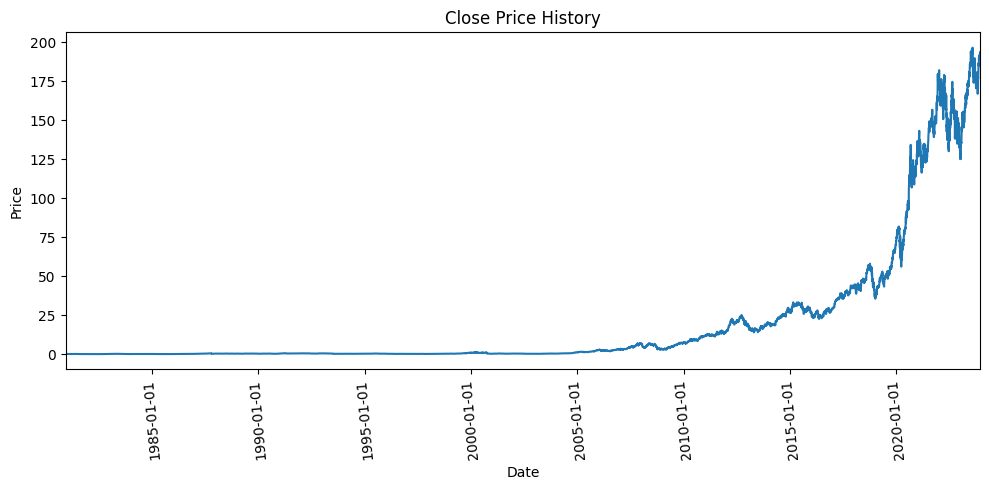

In [172]:
#Graph
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date")
plt.figure(figsize=(10, 5))
plt.plot(df["Date"], df["Close"])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.xticks(rotation=95)
plt.xlim(df["Date"].min(), df["Date"].max())
plt.title("Close Price History")
plt.xlabel("Date")
plt.ylabel("Price")
plt.tight_layout()
plt.show()

In [173]:
#Create model
model=RandomForestRegressor()

In [174]:
#Train
x=df[["Open","High","Low","Volume"]]
x=x[:int(len(df)-5)]
y=df['Close'].shift(-1)
y=y[:int(len(df)-5)]
model.fit(x,y)

RandomForestRegressor()

In [175]:
#Test model
print("The model score is: ",model.score(x,y))

The model score is:  0.9999255477581412


In [176]:
#Prediction
new_data=df[["Open","High","Low","Volume"]].tail(5)[-1:]
prediction=model.predict(new_data)
print("The model precits the last price to be:", prediction)
actual_value=df[["Close"]].tail(1).values[0][0]
print("Actual value:",actual_value)

The model precits the last price to be: [190.29170166]
Actual value: 193.419998


In [177]:
offset=actual_value-prediction
print("The model is off by : $",offset)

The model is off by : $ [3.12829634]


Linear Regression R^2 score on training data: 0.999572428916192

Predicted Close price for next day: $194.07
Actual last Close price: $193.42
The model is off by: $-0.65


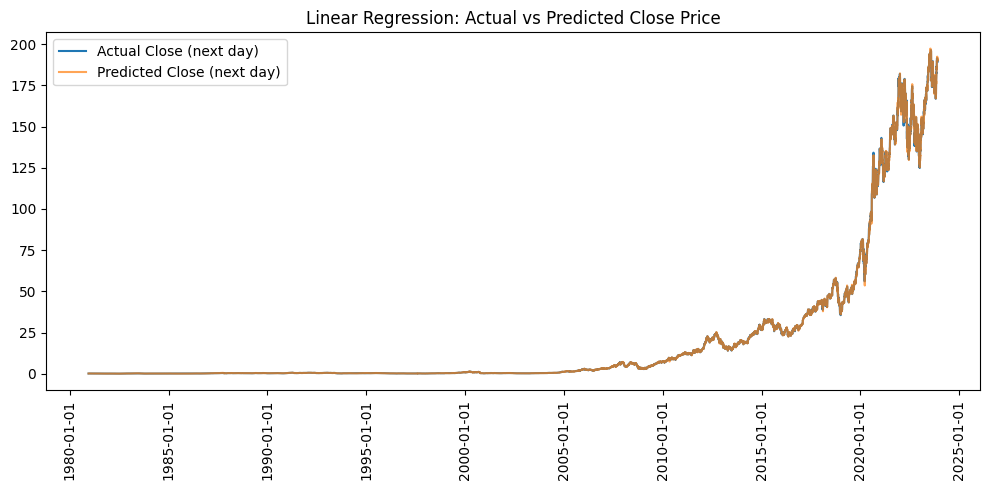

In [178]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df = pd.read_csv('AAPL.csv')
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date")

X = df[["Open", "High", "Low", "Volume"]][:-5]
y = df["Close"].shift(-1)[:-5]
model = LinearRegression()
model.fit(X, y)
print("Linear Regression R^2 score on training data:", model.score(X, y))
last_features = df[["Open", "High", "Low", "Volume"]].tail(1)
predicted_value = model.predict(last_features)[0]
actual_value = df["Close"].iloc[-1]


print(f"\nPredicted Close price for next day: ${predicted_value:.2f}")
print(f"Actual last Close price: ${actual_value:.2f}")
offset = actual_value - predicted_value
print(f"The model is off by: ${offset:.2f}")


y_pred = model.predict(X)
plt.figure(figsize=(10,5))
plt.plot(df["Date"][:-5], y, label="Actual Close (next day)")
plt.plot(df["Date"][:-5], y_pred, label="Predicted Close (next day)", alpha=0.7)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=90)
plt.legend()
plt.title("Linear Regression: Actual vs Predicted Close Price")
plt.tight_layout()
plt.show()
